## Business Problem

### Importing Libraries

In [2]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import dtreeviz
from dtreeviz.trees import *
from IPython.display import Image, display
import graphviz.backend as be
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv("Fraud_check.csv")

In [4]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


### Checking shape of the dataset

In [5]:
data.shape

(600, 6)

### Information of dataset

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.3+ KB


### Checking null values

In [7]:
data.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

### Descriptive Statistics

In [8]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [ ]:
data 

In [9]:
label_encoder = preprocessing.LabelEncoder()
data['Undergrad'] = label_encoder.fit_transform(data['Undergrad'])
data['Marital.Status'] = label_encoder.fit_transform(data['Marital.Status'])
data['Urban'] = label_encoder.fit_transform(data['Urban'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Undergrad        600 non-null    int32
 1   Marital.Status   600 non-null    int32
 2   Taxable.Income   600 non-null    int64
 3   City.Population  600 non-null    int64
 4   Work.Experience  600 non-null    int64
 5   Urban            600 non-null    int32
dtypes: int32(3), int64(3)
memory usage: 21.2 KB


In [10]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0


In [11]:
data['status'] = data['Taxable.Income'].apply(lambda tax_inc: 'Risky' if tax_inc <= 30000 else 'Good')

In [12]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,status
0,0,2,68833,50047,10,1,Good
1,1,0,33700,134075,18,1,Good
2,0,1,36925,160205,30,1,Good
3,1,2,50190,193264,15,1,Good
4,0,1,81002,27533,28,0,Good


In [13]:
data.shape

(600, 7)

In [14]:
data['status'].value_counts()

Good     476
Risky    124
Name: status, dtype: int64

In [15]:
data['status'] = label_encoder.fit_transform(data['status'])

In [16]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,status
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0


In [17]:
data['status'].value_counts()

0    476
1    124
Name: status, dtype: int64

In [18]:
X = data.iloc[:,0:5]
y = data['status']

In [19]:
X.shape

(600, 5)

In [20]:
y.shape

(600,)

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [22]:
X_train.shape

(480, 5)

In [23]:
X_test.shape

(120, 5)

In [24]:
y_train.shape

(480,)

In [25]:
y_test.shape

(120,)

In [26]:
model = tree.DecisionTreeRegressor()
model.fit(X_train,y_train)

DecisionTreeRegressor()

In [27]:
y_pred = model.predict(X_test)

In [28]:
y_pred

array([1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0.,
       1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       1.])

In [29]:
print(accuracy_score(y_test,y_pred)*100)

100.0


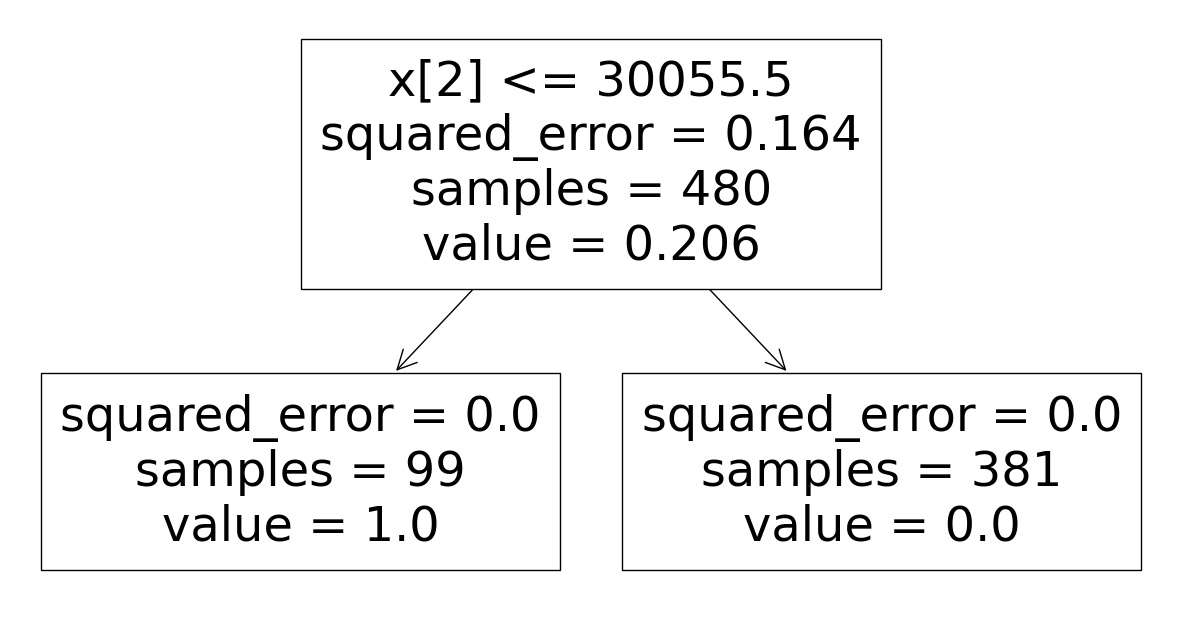

In [30]:
plt.figure(figsize=(15,8))
from sklearn.tree import plot_tree
plot_tree(model);

## Entropy

In [38]:
clf = DecisionTreeClassifier(criterion="entropy",max_depth=5)

In [39]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [40]:
y_preds = clf.predict(X_test)

In [41]:
print(accuracy_score(y_test,y_preds)*100)

100.0


#### dataset is gives best model with 100% accuracy so we no need implememt anything . By seeing the accuracy score we can  say model is best

## Classification Report

In [43]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        95
           1       1.00      1.00      1.00        25

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



## Tree

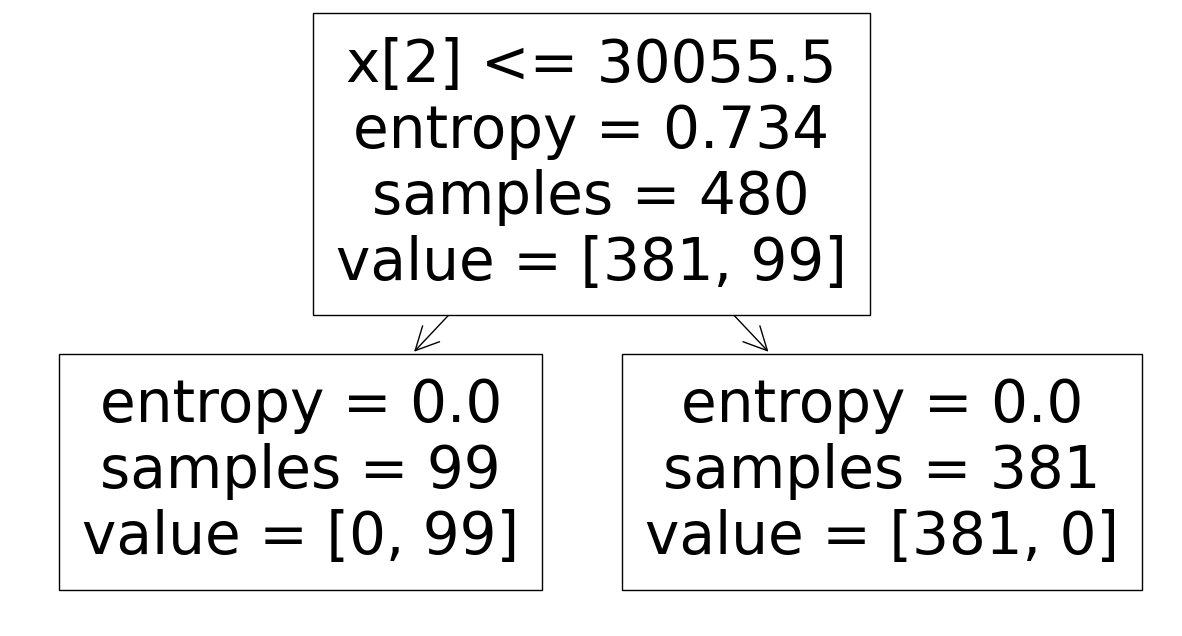

In [45]:
plt.figure(figsize=(15,8))
from sklearn.tree import plot_tree
plot_tree(clf);

## Checking for underfitting and overfitting

In [44]:
print('Training Score:{:.4f}'.format(clf.score(X_train,y_train)))
print('Test Score:{:.4f}'.format(clf.score(X_test,y_test)))

Training Score:1.0000
Test Score:1.0000


## Hyper Parametertuning

In [48]:
from sklearn.model_selection import GridSearchCV
param_grid={ 
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

reg = GridSearchCV(DecisionTreeClassifier(),param_grid=param_grid,cv=10)
reg.fit(X_train,y_train)


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [49]:
best_params = reg.best_params_
print("Best hyperparameters:", best_params)

# Train the model with the best hyperparameters
best_dt_classifier = DecisionTreeClassifier(**best_params)
best_dt_classifier.fit(X, y)

Best hyperparameters: {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


DecisionTreeClassifier()

# ! Thank You